In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02

In [3]:
reg = 'M8'
line = 'M8'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

7.526433868794324

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
dlog=-0.25

In [8]:
table = sosflog(data,dlog)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                              \
        count      mean       std       min       25%       50%       75%   
ils                                                                         
0    260240.0  8.228950  2.318763  5.623435  6.469693  7.585041  9.323414   
1    239039.0  4.363152  0.698075  3.162306  3.764389  4.350220  4.953166   
2    120766.0  2.505569  0.395592  1.778291  2.169696  2.523628  2.849126   
3     46192.0  1.417929  0.222570  1.000035  1.231312  1.430806  1.612476   
4     16495.0  0.797801  0.125003  0.562413  0.692903  0.806116  0.905830   
5      5479.0  0.450095  0.069898  0.316274  0.392127  0.456323  0.510218   
6      1786.0  0.253184  0.039141  0.177894  0.220851  0.256508  0.286522   
7       525.0  0.142221  0.022097  0.100069  0.123440  0.145296  0.160456   
8       175.0  0.080671  0.012402  0.057709  0.069234  0.080879  0.091031   
9        41.0  0.043752  0.006202  0.032081  0.038240  0.043752  0.048051   
10       23.0  0.027515  0.003871  0.019788  0.024525  0.028858  0.031061   
11        4.0  0.013190  0.001965  0.011549  0.011549  0.012871  0.014512   
13        1.0  0.004863       NaN  0.004863  0.004863  0.004863  0.004863   

                     dV2                                                \
           max     count       mean        std     min     25%     50%   
ils                                                                      
0    22.742882  260240.0  20.325468  26.299965  0.0000  2.1609  9.7969   
1     5.623397  239039.0  12.061661  15.192674  0.0000  1.5129  6.5025   
2     3.162270  120766.0  13.854413  17.568550  0.0000  1.4884  7.0225   
3     1.778227   46192.0   9.475467  13.328032  0.0000  0.7921  3.8809   
4     0.999957   16495.0   5.506051   9.077225  0.0000  0.3969  2.0164   
5     0.562280    5479.0   3.710251   8.201123  0.0000  0.2401  1.1236   
6     0.316135    1786.0   2.210748   4.958797  0.0000  0.1089  0.6084   
7     0.177313     525.0   1.273711   3.856853  0.0000  0.0729  0.3136   
8     0.099260     175.0   0.790393   1.931275  0.0000  0.0441  0.2025   
9     0.054972      41.0   0.431741   0.668949  0.0001  0.0225  0.1444   
10    0.031481      23.0   0.214917   0.277654  0.0036  0.0200  0.1156   
11    0.015469       4.0   0.263000   0.304419  0.0100  0.1225  0.1682   
13    0.004863       1.0   0.230400        NaN  0.2304  0.2304  0.2304   

                         
          75%       max  
ils                      
0    28.09000  268.6321  
1    16.97440  196.8409  
2    20.07040  207.6481  
3    13.32250  188.7876  
4     6.60490  130.8736  
5     4.06025  182.7904  
6     2.13160   68.7241  
7     0.96040   62.7264  
8     0.51850   16.5649  
9     0.64000    3.4596  
10    0.27080    1.1236  
11    0.30870    0.7056  
13    0.23040    0.2304

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

1.0906220690918478

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.3153141891147654

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

4.639533516365299

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
m = 1.3

In [16]:
rgrid = np.logspace(-2, 1)

(7.526433868794324, 1.0906220690918478, 1.3)

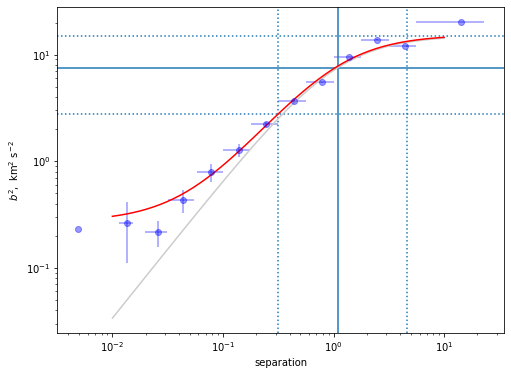

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], b2.mean()*0.05), color="red")

ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [18]:
table

s                                                              \
        count      mean       std       min       25%       50%       75%   
ils                                                                         
0    260240.0  8.228950  2.318763  5.623435  6.469693  7.585041  9.323414   
1    239039.0  4.363152  0.698075  3.162306  3.764389  4.350220  4.953166   
2    120766.0  2.505569  0.395592  1.778291  2.169696  2.523628  2.849126   
3     46192.0  1.417929  0.222570  1.000035  1.231312  1.430806  1.612476   
4     16495.0  0.797801  0.125003  0.562413  0.692903  0.806116  0.905830   
5      5479.0  0.450095  0.069898  0.316274  0.392127  0.456323  0.510218   
6      1786.0  0.253184  0.039141  0.177894  0.220851  0.256508  0.286522   
7       525.0  0.142221  0.022097  0.100069  0.123440  0.145296  0.160456   
8       175.0  0.080671  0.012402  0.057709  0.069234  0.080879  0.091031   
9        41.0  0.043752  0.006202  0.032081  0.038240  0.043752  0.048051   
10       23.0  0.027515  0.003871  0.019788  0.024525  0.028858  0.031061   
11        4.0  0.013190  0.001965  0.011549  0.011549  0.012871  0.014512   
13        1.0  0.004863       NaN  0.004863  0.004863  0.004863  0.004863   

                     dV2                                                \
           max     count       mean        std     min     25%     50%   
ils                                                                      
0    22.742882  260240.0  20.325468  26.299965  0.0000  2.1609  9.7969   
1     5.623397  239039.0  12.061661  15.192674  0.0000  1.5129  6.5025   
2     3.162270  120766.0  13.854413  17.568550  0.0000  1.4884  7.0225   
3     1.778227   46192.0   9.475467  13.328032  0.0000  0.7921  3.8809   
4     0.999957   16495.0   5.506051   9.077225  0.0000  0.3969  2.0164   
5     0.562280    5479.0   3.710251   8.201123  0.0000  0.2401  1.1236   
6     0.316135    1786.0   2.210748   4.958797  0.0000  0.1089  0.6084   
7     0.177313     525.0   1.273711   3.856853  0.0000  0.0729  0.3136   
8     0.099260     175.0   0.790393   1.931275  0.0000  0.0441  0.2025   
9     0.054972      41.0   0.431741   0.668949  0.0001  0.0225  0.1444   
10    0.031481      23.0   0.214917   0.277654  0.0036  0.0200  0.1156   
11    0.015469       4.0   0.263000   0.304419  0.0100  0.1225  0.1682   
13    0.004863       1.0   0.230400        NaN  0.2304  0.2304  0.2304   

                         
          75%       max  
ils                      
0    28.09000  268.6321  
1    16.97440  196.8409  
2    20.07040  207.6481  
3    13.32250  188.7876  
4     6.60490  130.8736  
5     4.06025  182.7904  
6     2.13160   68.7241  
7     0.96040   62.7264  
8     0.51850   16.5649  
9     0.64000    3.4596  
10    0.27080    1.1236  
11    0.30870    0.7056  
13    0.23040    0.2304

In [19]:
M8 = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [20]:
f = open('Sfresults\\'+ line + '.pkl',"wb")
pickle.dump(M8,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.9531543254852295 seconds ---
